In [32]:
import pandas as pd
from pycaret.classification import *
from tqdm import tqdm

# 데이콘 점수

In [33]:
# 제출 점수(제출 날짜) : 0.6330873309(2021-12-17 12:12:01)

# 설정

In [34]:
# id, contents_open_dt 제거 : ⭕
# 모든 값이 1인 person_prefer_f, person_prefer_g 열 제거 : ⭕
# tune_cat

In [ ]:
# bool형 특성 숫자형으로 변환(pycaret에서 특성 타입 빈값으로 나옴) : ❌

![pycaret_col_setup01](이미지\pycaret_col_setup01.png)

# 데이터 불러오기

In [35]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# 데이터 확인

In [36]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [37]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,...,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,...,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,...,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,...,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,...,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [38]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [39]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,...,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,...,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,...,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,...,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,...,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,...,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


# 필요 데이터 추출

In [40]:
# person_rn :  사용자번호
# contents_rn :  컨텐츠번호
# contents_open_dt :  컨텐츠 열람 일시

## 훈련에 의미가 적은 열 제거

In [41]:
# id, contents_open_dt 제거 : ⭕
# 모든 값이 1인 person_prefer_f, person_prefer_g 열 제거 : ⭕
# person_rn, contents_rn 제거 : ❌

In [42]:
train = train.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g'], axis=1)
test = test.drop(['id', 'contents_open_dt', 'person_prefer_f', 'person_prefer_g'], axis=1)

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   h_l_match_yn            501951 non-null  bool 
 4   h_m_match_yn            501951 non-null  bool 
 5   h_s_match_yn            501951 non-null  bool 
 6   person_attribute_a      501951 non-null  int64
 7   person_attribute_a_1    501951 non-null  int64
 8   person_attribute_b      501951 non-null  int64
 9   person_prefer_c         501951 non-null  int64
 10  person_prefer_d_1       501951 non-null  int64
 11  person_prefer_d_2       501951 non-null  int64
 12  person_prefer_d_3       501951 non-null  int64
 13  person_prefer_e         501951 non-null  int64
 14  person_prefer_h_1       501951 non-null  int64
 15  

In [45]:
train.iloc[:,15:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 16 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   person_prefer_h_2       501951 non-null  int64
 1   person_prefer_h_3       501951 non-null  int64
 2   contents_attribute_i    501951 non-null  int64
 3   contents_attribute_a    501951 non-null  int64
 4   contents_attribute_j_1  501951 non-null  int64
 5   contents_attribute_j    501951 non-null  int64
 6   contents_attribute_c    501951 non-null  int64
 7   contents_attribute_k    501951 non-null  int64
 8   contents_attribute_l    501951 non-null  int64
 9   contents_attribute_d    501951 non-null  int64
 10  contents_attribute_m    501951 non-null  int64
 11  contents_attribute_e    501951 non-null  int64
 12  contents_attribute_h    501951 non-null  int64
 13  person_rn               501951 non-null  int64
 14  contents_rn             501951 non-null  int64
 15  

# 모델 학습/예측

In [46]:
ex = setup(train, target='target', n_jobs=3, session_id=0, verbose=False, silent=False, 
 fold=5, fold_shuffle=True)

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
d_l_match_yn,Categorical
d_m_match_yn,Categorical
d_s_match_yn,Categorical
h_l_match_yn,Categorical
h_m_match_yn,Categorical
h_s_match_yn,Categorical
person_attribute_a,Categorical
person_attribute_a_1,Categorical
person_attribute_b,Categorical
person_prefer_c,Categorical


In [47]:
compare_models(sort='F1')
# 37m 9s

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.6229,0.6724,0.6703,0.6119,0.6398,0.2458,0.2469,56.9840
xgboost,Extreme Gradient Boosting,0.6187,0.6663,0.6666,0.6081,0.6360,0.2375,0.2386,61.6640
lightgbm,Light Gradient Boosting Machine,0.6126,0.6590,0.6693,0.6009,0.6333,0.2253,0.2268,4.5760
rf,Random Forest Classifier,0.6138,0.6604,0.6236,0.6113,0.6173,0.2275,0.2276,52.6660
gbc,Gradient Boosting Classifier,0.5999,0.6413,0.6396,0.5922,0.6150,0.1998,0.2005,85.7580
ada,Ada Boost Classifier,0.5932,0.6318,0.6185,0.5884,0.6031,0.1865,0.1867,17.7560
et,Extra Trees Classifier,0.5977,0.6381,0.5962,0.5977,0.5969,0.1955,0.1955,70.5400
ridge,Ridge Classifier,0.5892,0.0000,0.6058,0.5860,0.5957,0.1784,0.1785,0.6040
lda,Linear Discriminant Analysis,0.5892,0.6242,0.6058,0.5860,0.5957,0.1784,0.1785,6.0380
qda,Quadratic Discriminant Analysis,0.5000,0.5002,0.7288,0.4999,0.5854,0.0003,0.0014,5.4020


In [48]:
cat = create_model('catboost')
# 7m 8s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6210,0.6711,0.6679,0.6104,0.6378,0.2422,0.2432
1,0.6225,0.6714,0.6694,0.6117,0.6393,0.2450,0.2461
2,0.6232,0.6748,0.6696,0.6125,0.6397,0.2465,0.2476
3,0.6250,0.6733,0.6734,0.6136,0.6421,0.2500,0.2512
4,0.6226,0.6712,0.6712,0.6114,0.6399,0.2453,0.2464
Mean,0.6229,0.6724,0.6703,0.6119,0.6398,0.2458,0.2469
SD,0.0013,0.0014,0.0019,0.0011,0.0014,0.0025,0.0026


In [49]:
tuned_cat = tune_model(cat)
# 11m 15s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.6171,0.6637,0.6631,0.6069,0.6338,0.2343,0.2353
1,0.6164,0.6639,0.6602,0.6067,0.6323,0.2328,0.2337
2,0.6189,0.6681,0.6640,0.6087,0.6352,0.2378,0.2388
3,0.6179,0.6648,0.6601,0.6085,0.6332,0.2359,0.2368
4,0.6165,0.6620,0.6617,0.6066,0.6329,0.2331,0.2341
Mean,0.6174,0.6645,0.6618,0.6075,0.6335,0.2348,0.2357
SD,0.0009,0.0020,0.0015,0.0009,0.0010,0.0019,0.0019


In [50]:
pred = predict_model(tuned_cat, test)

In [51]:
pred.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,...,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,Label,Score
0,True,False,False,True,True,True,1,1,2,1,...,2,1147,839,1,5,263,393790,236865,0,0.5042
1,False,False,False,True,False,False,2,0,2,2,...,2,1611,278,1,4,263,394058,236572,1,0.5713
2,True,False,False,True,True,True,2,3,2,1,...,2,1817,490,3,4,177,1002061,704612,0,0.5969
3,True,False,False,True,True,True,1,2,2,5,...,2,101,150,5,3,177,1000813,704652,1,0.5048
4,True,False,False,True,False,False,1,6,4,5,...,1,985,1097,1,4,177,111146,704413,0,0.5115


In [52]:
pred.iloc[:,-2:].head()

,Label,Score
0,0,0.5042
1,1,0.5713
2,0,0.5969
3,1,0.5048
4,0,0.5115


In [53]:
pred['Label'].value_counts()

1    25409
0    20995
Name: Label, dtype: int64

# 제출파일 생성

In [54]:
submission = pd.read_csv('../data/sample_submission.csv')
submission['target'] = pred['Label']

submission.to_csv('sub_ver0.6.csv', index=False)

# 모델 분석 그래프

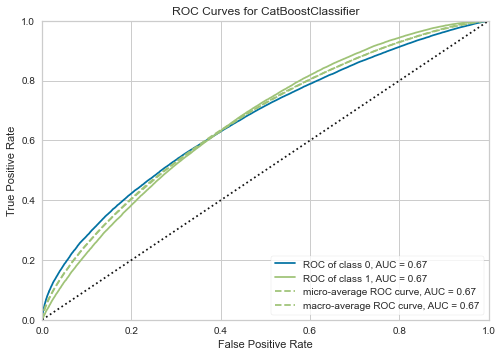

In [56]:
plot_model(tuned_cat)